<h1><font color="black">ECE 2372: HW3</font></h1>

<h2><font color="black">Initialize Data</font></h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import random
import math

# Load MATLAB file data
mat_data1 = scipy.io.loadmat('synthetic1.mat')
mat_data2 = scipy.io.loadmat('synthetic2.mat')
mat_data3 = scipy.io.loadmat('synthetic3.mat')
mat_data4 = scipy.io.loadmat('synthetic4.mat')
mat_datatest = scipy.io.loadmat('testLDA.mat')
mat_datatrain = scipy.io.loadmat('trainTrain.mat')

# Access variables in the MATLAB files
X1 = mat_data1['X']
Y1 = mat_data1['Y']

X2 = mat_data2['X']
Y2 = mat_data2['Y']
w = mat_data2['w']
b = mat_data2['b']

X3 = mat_data3['X']
Y3 = mat_data3['Y']

X4 = mat_data4['X']
Y4 = mat_data4['Y']

Xtest = mat_datatest['Xtest']
Ytest = mat_datatest['Ytest']

Xtrain = mat_datatrain['Xtrain']
Ytrain = mat_datatrain['Ytrain']

<h2><font color="black">Plot the Initial Synthetic Data</font></h2>

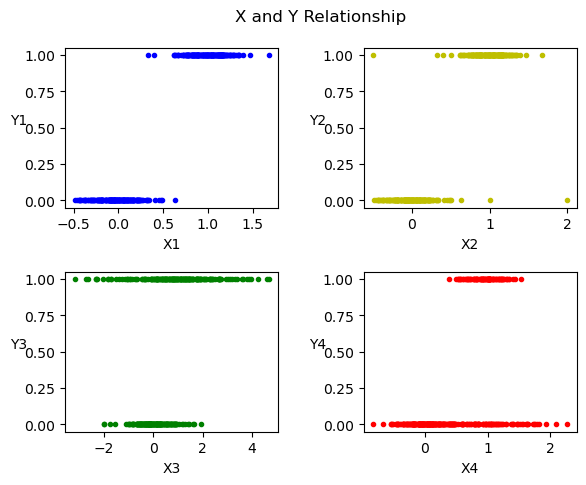

In [2]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle('X and Y Relationship')
Y1 = Y1.ravel()
Y2 = Y2.ravel()
Y3 = Y3.ravel()
Y4 = Y4.ravel()
for i in range(2):
    axs[0, 0].plot(X1[i],Y1,'b.')
    axs[0, 0].set_xlabel('X1')
    axs[0, 0].set_ylabel('Y1', rotation=0)
    axs[0, 1].plot(X2[i],Y2,'y.')
    axs[0, 1].set_xlabel('X2')
    axs[0, 1].set_ylabel('Y2', rotation=0)
    axs[1, 0].plot(X3[i],Y3,'g.')
    axs[1, 0].set_xlabel('X3')
    axs[1, 0].set_ylabel('Y3', rotation=0)
    axs[1, 1].plot(X4[i],Y4,'r.')
    axs[1, 1].set_xlabel('X4')
    axs[1, 1].set_ylabel('Y4', rotation=0)

plt.show()

<h2><font color="black">Problem 1</font></h2>

<h2><font color="black">With starting point $$\theta^{0} = 0$$ and for iterations $$j \geq 1$$ the algorithm proceeds by setting $$\theta^{j} = \theta^{j-1} + y_{i}\bar{x}_{i}$$</font></h2>

<h2><font color="black">Part (a)</font></h2>

<h2><font color="black">Suppose that ${\theta}^*$ is normalized so that $\rho = \min_i | \langle {\theta}^*, \bar{x}_i \rangle |$ calculates the distance between the closest ${x}_i$ in the training data to the hyperplane defined by ${\theta}^*$. Please argue that $$min_{i} y_i \langle {\theta}^*, \bar{x}_i \rangle = \rho > 0$$</font></h2>

<h2><font color="red">We must have $\rho$ s.t. $\rho \gt 0$ so that the classes are linearly seperable. If $\rho = 0$, we do not achieve seperability. Lastly, $\rho \lt 0$ is impossible by definition.</font></h2>

<h2><font color="black">Part (b)</font></h2>

<h2><font color="black">Show by induction that $$\langle {\theta}^j, {\theta}^* \rangle \geq \langle {\theta}^{j-1}, {\theta}^* \rangle + \rho$$ and conclude that $\langle {\theta}^j, {\theta}^* \rangle \geq j\rho$</font></h2>

<h2><font color="red">Base Case: $\langle {\theta}^0, {\theta}^* \rangle = 0$</font></h2>

<h2><font color="red">Inductive Hypothesis: $\langle {\theta}^j, {\theta}^* \rangle = \langle {\theta}^{j-1} + y_{i}x_{i}, {\theta}^* \rangle$ </font></h2>

<h2><font color="red">$= \langle {\theta}^{j-1}, {\theta}^* \rangle + y_{i}\langle x_{i}, {\theta}^* \rangle$</font></h2>

<h2><font color="red">$\geq \langle \theta^{j-1}, {\theta}^* \rangle + \rho$</font></h2>

<h2><font color="red">
And by definition...
$y_{i}\langle x_{i}, {\theta}^* \rangle \geq \rho$</font></h2>

<h2><font color="red">Inductive Step: $\langle \theta^{j+1}, \theta^* \rangle \geq j\rho$</font></h2>

<h2><font color="black">Part (c)</font></h2>

<h2><font color="black">By using the fact that $\bar{x}_{i}$ was misclassified by ${\theta}^{j-1}$ to show that $$\|{\theta}^j\|^2 \leq \|{\theta}^{j-1}\|^2 + \|\bar{x}_{i}\|^2$$</font></h2>

<h2><font color="red">First, we have... $\|{\theta}^j\|^2 = \|{\theta}^{j-1} + y_{i}x_{i}\|^2$</font></h2>

 <h2><font color="red">Expand... $= \|{\theta}^{j-1}\|^2 + y_{i}^2\|{x}_{i}\|^2 + \langle 2y_{i}x_{i}, \theta^{j-1} \rangle$</font></h2>

<h2><font color="red"> Because the the point was misclassified, $y_{i}^2 = 1$, the dot product will be positive, thus... $\|{\theta}^j\|^2 \leq \|{\theta}^{j-1}\|^2 + \|{x}_{i}\|^2$</font></h2>

<h2><font color="black">Part (d)</font></h2>

<h2><font color="black">Again, by induction, show that $$\|{\theta}^j\|^2 \leq j(1 + R^2)$$ where $R = max_i \|{x}_i\|$, and $\|\cdot\|$ is just the Euclidean norm.</font></h2>

<h2><font color="red">Base Case: $\|{\theta}^0\|^2 = 0$</font></h2>

<h2><font color="red">Inductive Hypothesis (from above): First, we have... $\|{\theta}^j\|^2 = \|{\theta}^{j-1} + y_{i}x_{i}\|^2$</font></h2>

<h2><font color="red">Expand... $= \|{\theta}^{j-1}\|^2 + y_{i}^2\|{x}_{i}\|^2 + \langle 2y_{i}x_{i}, \theta^{j-1} \rangle$</font></h2>

<h2><font color="red">Because the the point was misclassified, $y_{i}^2 = 1$, the dot product will be positive, thus... $\|{\theta}^j\|^2 \leq \|{\theta}^{j-1}\|^2 + \|{x}_{i}\|^2$</font></h2>

<h2><font color="red">So... $ \|{\theta}^j\|^2 \leq \|{\theta}^{j-1}\|^2 + R^2$</font></h2>

<h2><font color="red">Inductive Step: $\|{\theta}^{j+1}\|^2 \leq j(1+R^2)$</font></h2>

<h2><font color="black">Part (e)</font></h2>

<h2><font color="black">Using Cauchy-Schwartz inequality, show (b) and (d) together implies that
$$j \leq \frac{(1 + R^2) \|{\theta}^*\|^2}{\rho^2}$$</font></h2>

<h2><font color="red">From (b): $\langle \theta^{j+1}, \theta^* \rangle \geq j\rho$</font></h2>

<h2><font color="red">From (d): $\|{\theta}^{j+1}\|^2 \leq j(1+R^2)$</font></h2>

<h2><font color="red">The norm squared of a vector is defined as follows: $\|{\theta}^{j+1}\|^2 \leq \langle {\theta}^{j+1}, {\theta}^{j+1} \rangle$ and $\|{\theta}^{*}\|^2 \leq \langle {\theta}^{*}, {\theta}^{*} \rangle$</font></h2>

<h2><font color="red">Using Cauchy-Schwartz inequality: $\|\langle \theta^{j+1}, \theta^* \rangle\|^2 \leq \langle {\theta}^{j+1}, {\theta}^{j+1} \rangle \cdot \langle {\theta}^{*}, {\theta}^{*} \rangle$</font></h2>

<h2><font color="red">Substituting: $(j\rho)^2 \leq j(1 + R^2) \cdot \|{\theta}^{*}\|^2 $</font></h2>

<h2><font color="red">$j^2 \leq \frac{j(1 + R^2) \cdot \|{\theta}^{*}\|^2}{\rho^2} $</font></h2>

<h2><font color="red">$j \leq \frac{(1 + R^2) \cdot \|{\theta}^{*}\|^2}{\rho^2}$</font></h2>

<h2><font color="black">Problem 2</font></h2>

<h3><font color="black">Method definitions. (Trying two algorithms out)</font></h3>

In [3]:
def calculate_cost_perceptron(Xi, Yi, X): 
    n = len(Yi)
    predictions = np.sign(Xi.dot(X))
    cost = np.maximum(0, -Yi * predictions).sum() / n
    return cost

def perceptron_model(Xi, Yi, X, alpha=0.01, iterations=200):
    n = len(Yi)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        cost = 0.0
        for j in range(n):
            rand_num = np.random.randint(0, 2)
            X_i = Xi[rand_num, :]
            Y_i = Yi[:]
            # Predictions given by the sign function
            predictions = np.sign(-np.dot(X_i, X))
            # The gradient of the cost function for perceptron model
            X = X - (1/n)*(1/2)*(X_i.T.dot((predictions - Y_i)))
            cost += calculate_cost_perceptron(X_i, Y_i, X)
        cost_history[i]  = cost/n
        
    return X, cost_history

def perceptron_model2(Xi, Yi, X, alpha=0.01, iterations=200):
    n = len(Yi)
    cost_history = np.zeros(iterations)
    m_list = np.zeros(iterations)
    
    for i in range(iterations):
        cost = 0.0
        m = 0
        for j in range(2):
            X_i = Xi[j, :]
            Y_i = Yi[:]
            predictions = np.sign(np.dot(X_i, X))
            prediction = 0 if (predictions.all() == False) else 1
            # Update rule for perceptron learning
            if Y_i[i] * prediction <= 0:
                X = X + alpha * Y_i * X_i
                m += 1
            cost += calculate_cost_perceptron(X_i, Y_i, X)
        cost_history[i] = cost / n
        m_list[i] = m
        if m == 0:
            break
            
    return X, cost_history, m_list

<h3><font color="black">Initial weight is zero for the perceptron model.</font></h3>

Initial Guess for synthetic 1: 0.000
Final cost for synthetic 1 using logistic regression: 127.500

Initial Guess for synthetic 2: 0.000
Final cost for synthetic 2 using logistic regression: 126.913

Initial Guess for synthetic 3: 0.000
Final cost for synthetic 3 using logistic regression: 104.703

Initial Guess for synthetic 4: 0.000
Final cost for synthetic 4 using logistic regression: 63.750



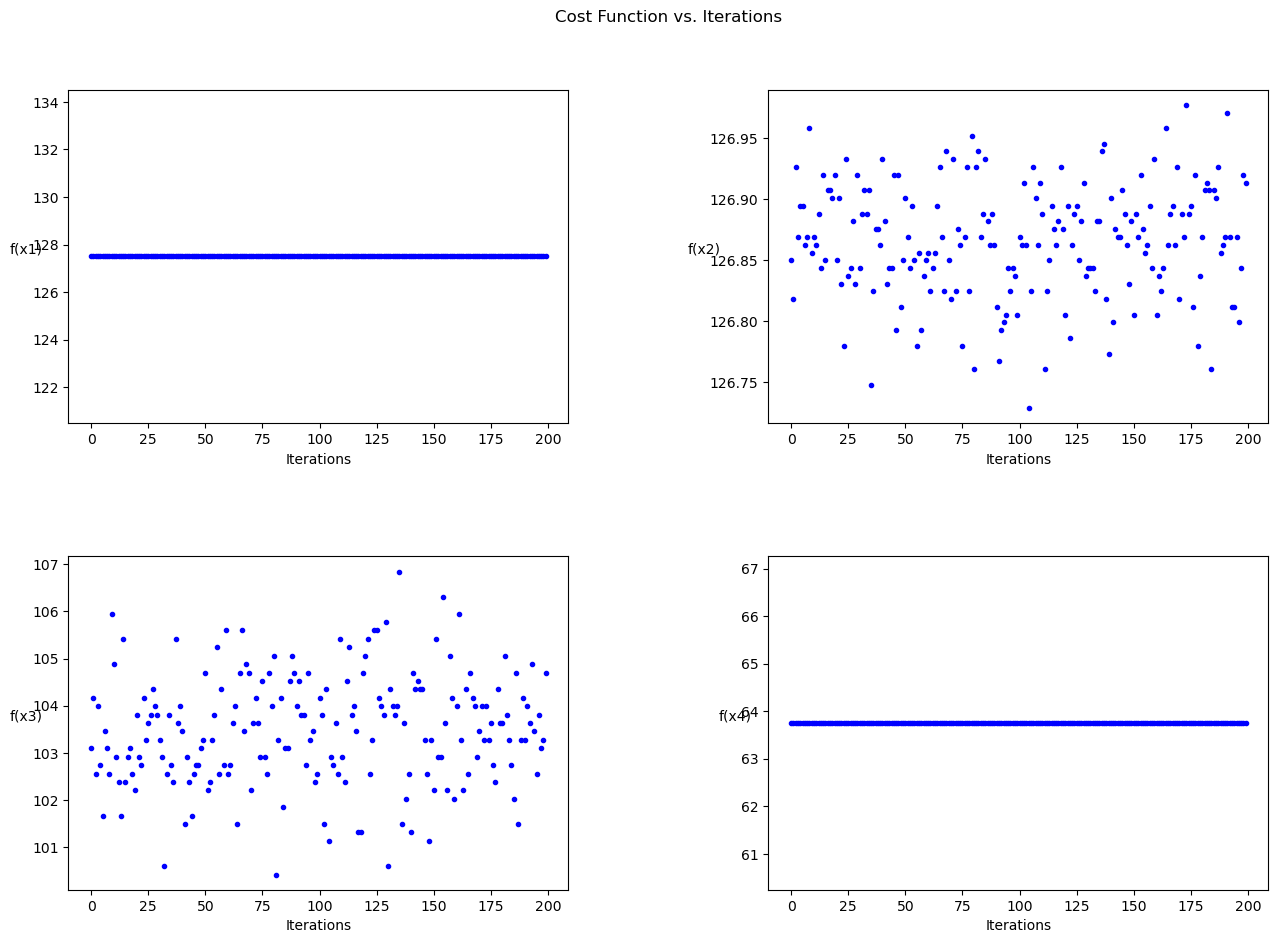

In [4]:
# Main method
if __name__ == "__main__":
    # Initialize variables
    alpha = 0.01
    n_iter = 200

    X0 = 0
        
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('Cost Function vs. Iterations')
    
    X, cost_history = perceptron_model(X1, Y1, X0, alpha, n_iter)
    print('Initial Guess for synthetic 1: {:0.3f}'.format(X0))
    print('Final cost for synthetic 1 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 0].set_ylabel('f(x1)', rotation=0)
    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].plot(range(n_iter), cost_history, 'b.')
    
    X, cost_history = perceptron_model(X2, Y2, X0, alpha, n_iter)
    print('Initial Guess for synthetic 2: {:0.3f}'.format(X0))
    print('Final cost for synthetic 2 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[0, 1].set_ylabel('f(x2)', rotation=0)
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].plot(range(n_iter), cost_history, 'b.')
    
    X, cost_history = perceptron_model(X3, Y3, X0, alpha, n_iter)
    print('Initial Guess for synthetic 3: {:0.3f}'.format(X0))
    print('Final cost for synthetic 3 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 0].set_ylabel('f(x3)', rotation=0)
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].plot(range(n_iter), cost_history, 'b.')
    
    X, cost_history = perceptron_model(X4, Y4, X0, alpha, n_iter)
    print('Initial Guess for synthetic 4: {:0.3f}'.format(X0))
    print('Final cost for synthetic 4 using logistic regression: {:0.3f}\n'.format(cost_history[-1]))
    axs[1, 1].set_ylabel('f(x4)', rotation=0)
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].plot(range(n_iter), cost_history, 'b.')

Initial Guess for synthetic 1: 0.000
Final cost for synthetic 1 using logistic regression: 0.000
Final misclassified points for synthetic 1 using perceptron learning algorithm: 0.000

Initial Guess for synthetic 2: 0.000
Final cost for synthetic 2 using logistic regression: 0.000
Final misclassified points for synthetic 2 using perceptron learning algorithm: 0.000

Initial Guess for synthetic 3: 0.000
Final cost for synthetic 3 using logistic regression: 0.000
Final misclassified points for synthetic 3 using perceptron learning algorithm: 0.000

Initial Guess for synthetic 4: 0.000
Final cost for synthetic 4 using logistic regression: 0.000
Final misclassified points for synthetic 4 using perceptron learning algorithm: 0.000



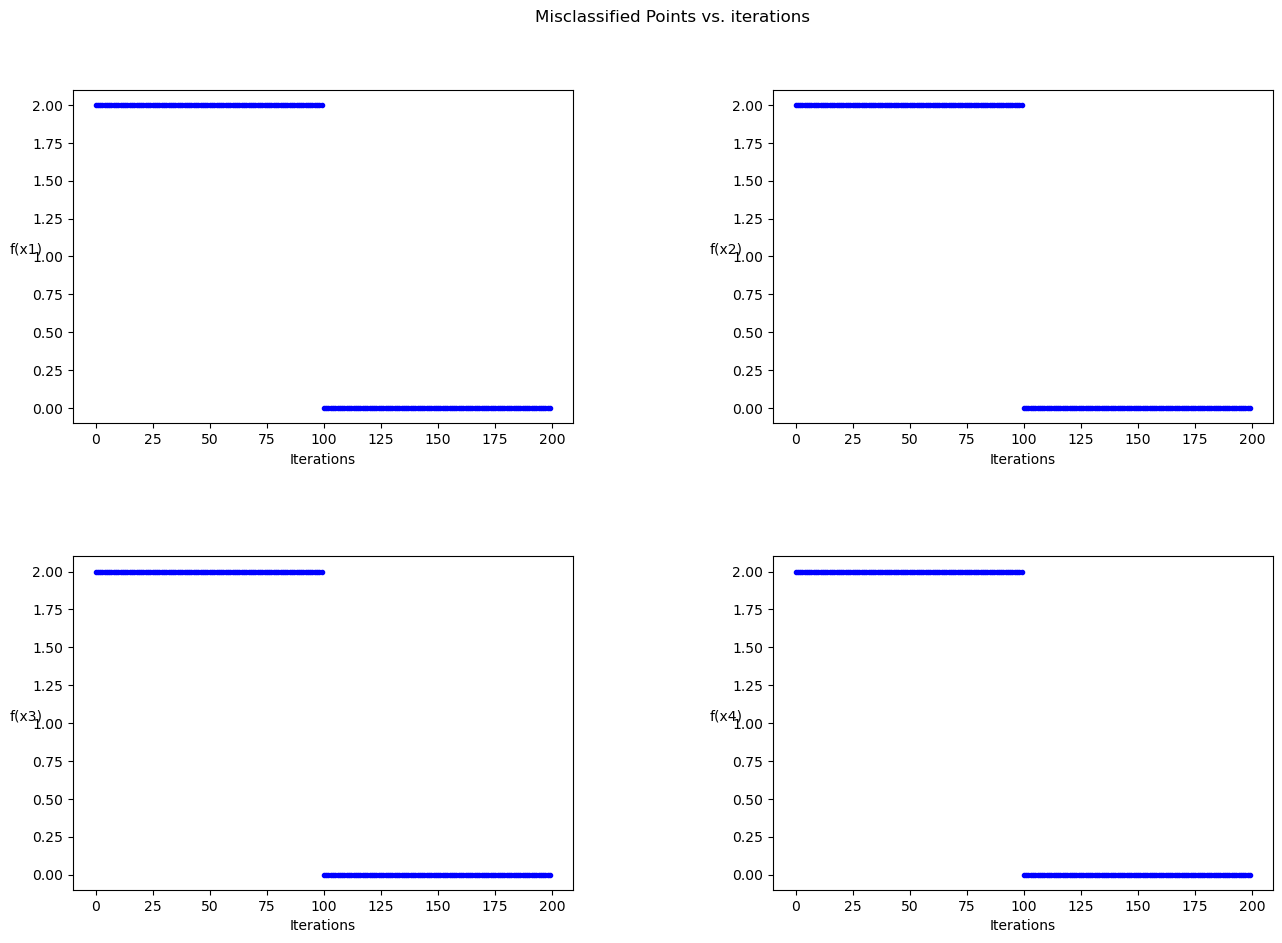

In [5]:
# Main method
if __name__ == "__main__":
    # Initialize variables
    alpha = 0.01
    n_iter = 200

    X0 = 0
        
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('Misclassified Points vs. iterations')
    
    X, cost_history, m_list = perceptron_model2(X1, Y1, X0, alpha, n_iter)
    print('Initial Guess for synthetic 1: {:0.3f}'.format(X0))
    print('Final cost for synthetic 1 using logistic regression: {:0.3f}'.format(cost_history[-1]))
    print('Final misclassified points for synthetic 1 using perceptron learning algorithm: {:0.3f}\n'.format(m_list[-1]))
    axs[0, 0].set_ylabel('f(x1)', rotation=0)
    axs[0, 0].set_xlabel('Iterations')
    axs[0, 0].plot(range(n_iter), m_list, 'b.')
    
    X, cost_histor, x_listy = perceptron_model2(X2, Y2, X0, alpha, n_iter)
    print('Initial Guess for synthetic 2: {:0.3f}'.format(X0))
    print('Final cost for synthetic 2 using logistic regression: {:0.3f}'.format(cost_history[-1]))
    print('Final misclassified points for synthetic 2 using perceptron learning algorithm: {:0.3f}\n'.format(m_list[-1]))
    axs[0, 1].set_ylabel('f(x2)', rotation=0)
    axs[0, 1].set_xlabel('Iterations')
    axs[0, 1].plot(range(n_iter), m_list, 'b.')
    
    X, cost_history, x_list = perceptron_model2(X3, Y3, X0, alpha, n_iter)
    print('Initial Guess for synthetic 3: {:0.3f}'.format(X0))
    print('Final cost for synthetic 3 using logistic regression: {:0.3f}'.format(cost_history[-1]))
    print('Final misclassified points for synthetic 3 using perceptron learning algorithm: {:0.3f}\n'.format(m_list[-1]))
    axs[1, 0].set_ylabel('f(x3)', rotation=0)
    axs[1, 0].set_xlabel('Iterations')
    axs[1, 0].plot(range(n_iter), m_list, 'b.')
    
    X, cost_history, x_list = perceptron_model2(X4, Y4, X0, alpha, n_iter)
    print('Initial Guess for synthetic 4: {:0.3f}'.format(X0))
    print('Final cost for synthetic 4 using logistic regression: {:0.3f}'.format(cost_history[-1]))
    print('Final misclassified points for synthetic 4 using perceptron learning algorithm: {:0.3f}\n'.format(m_list[-1]))
    axs[1, 1].set_ylabel('f(x4)', rotation=0)
    axs[1, 1].set_xlabel('Iterations')
    axs[1, 1].plot(range(n_iter), m_list, 'b.')

<h2><font color="black">Problem 3</font></h2>

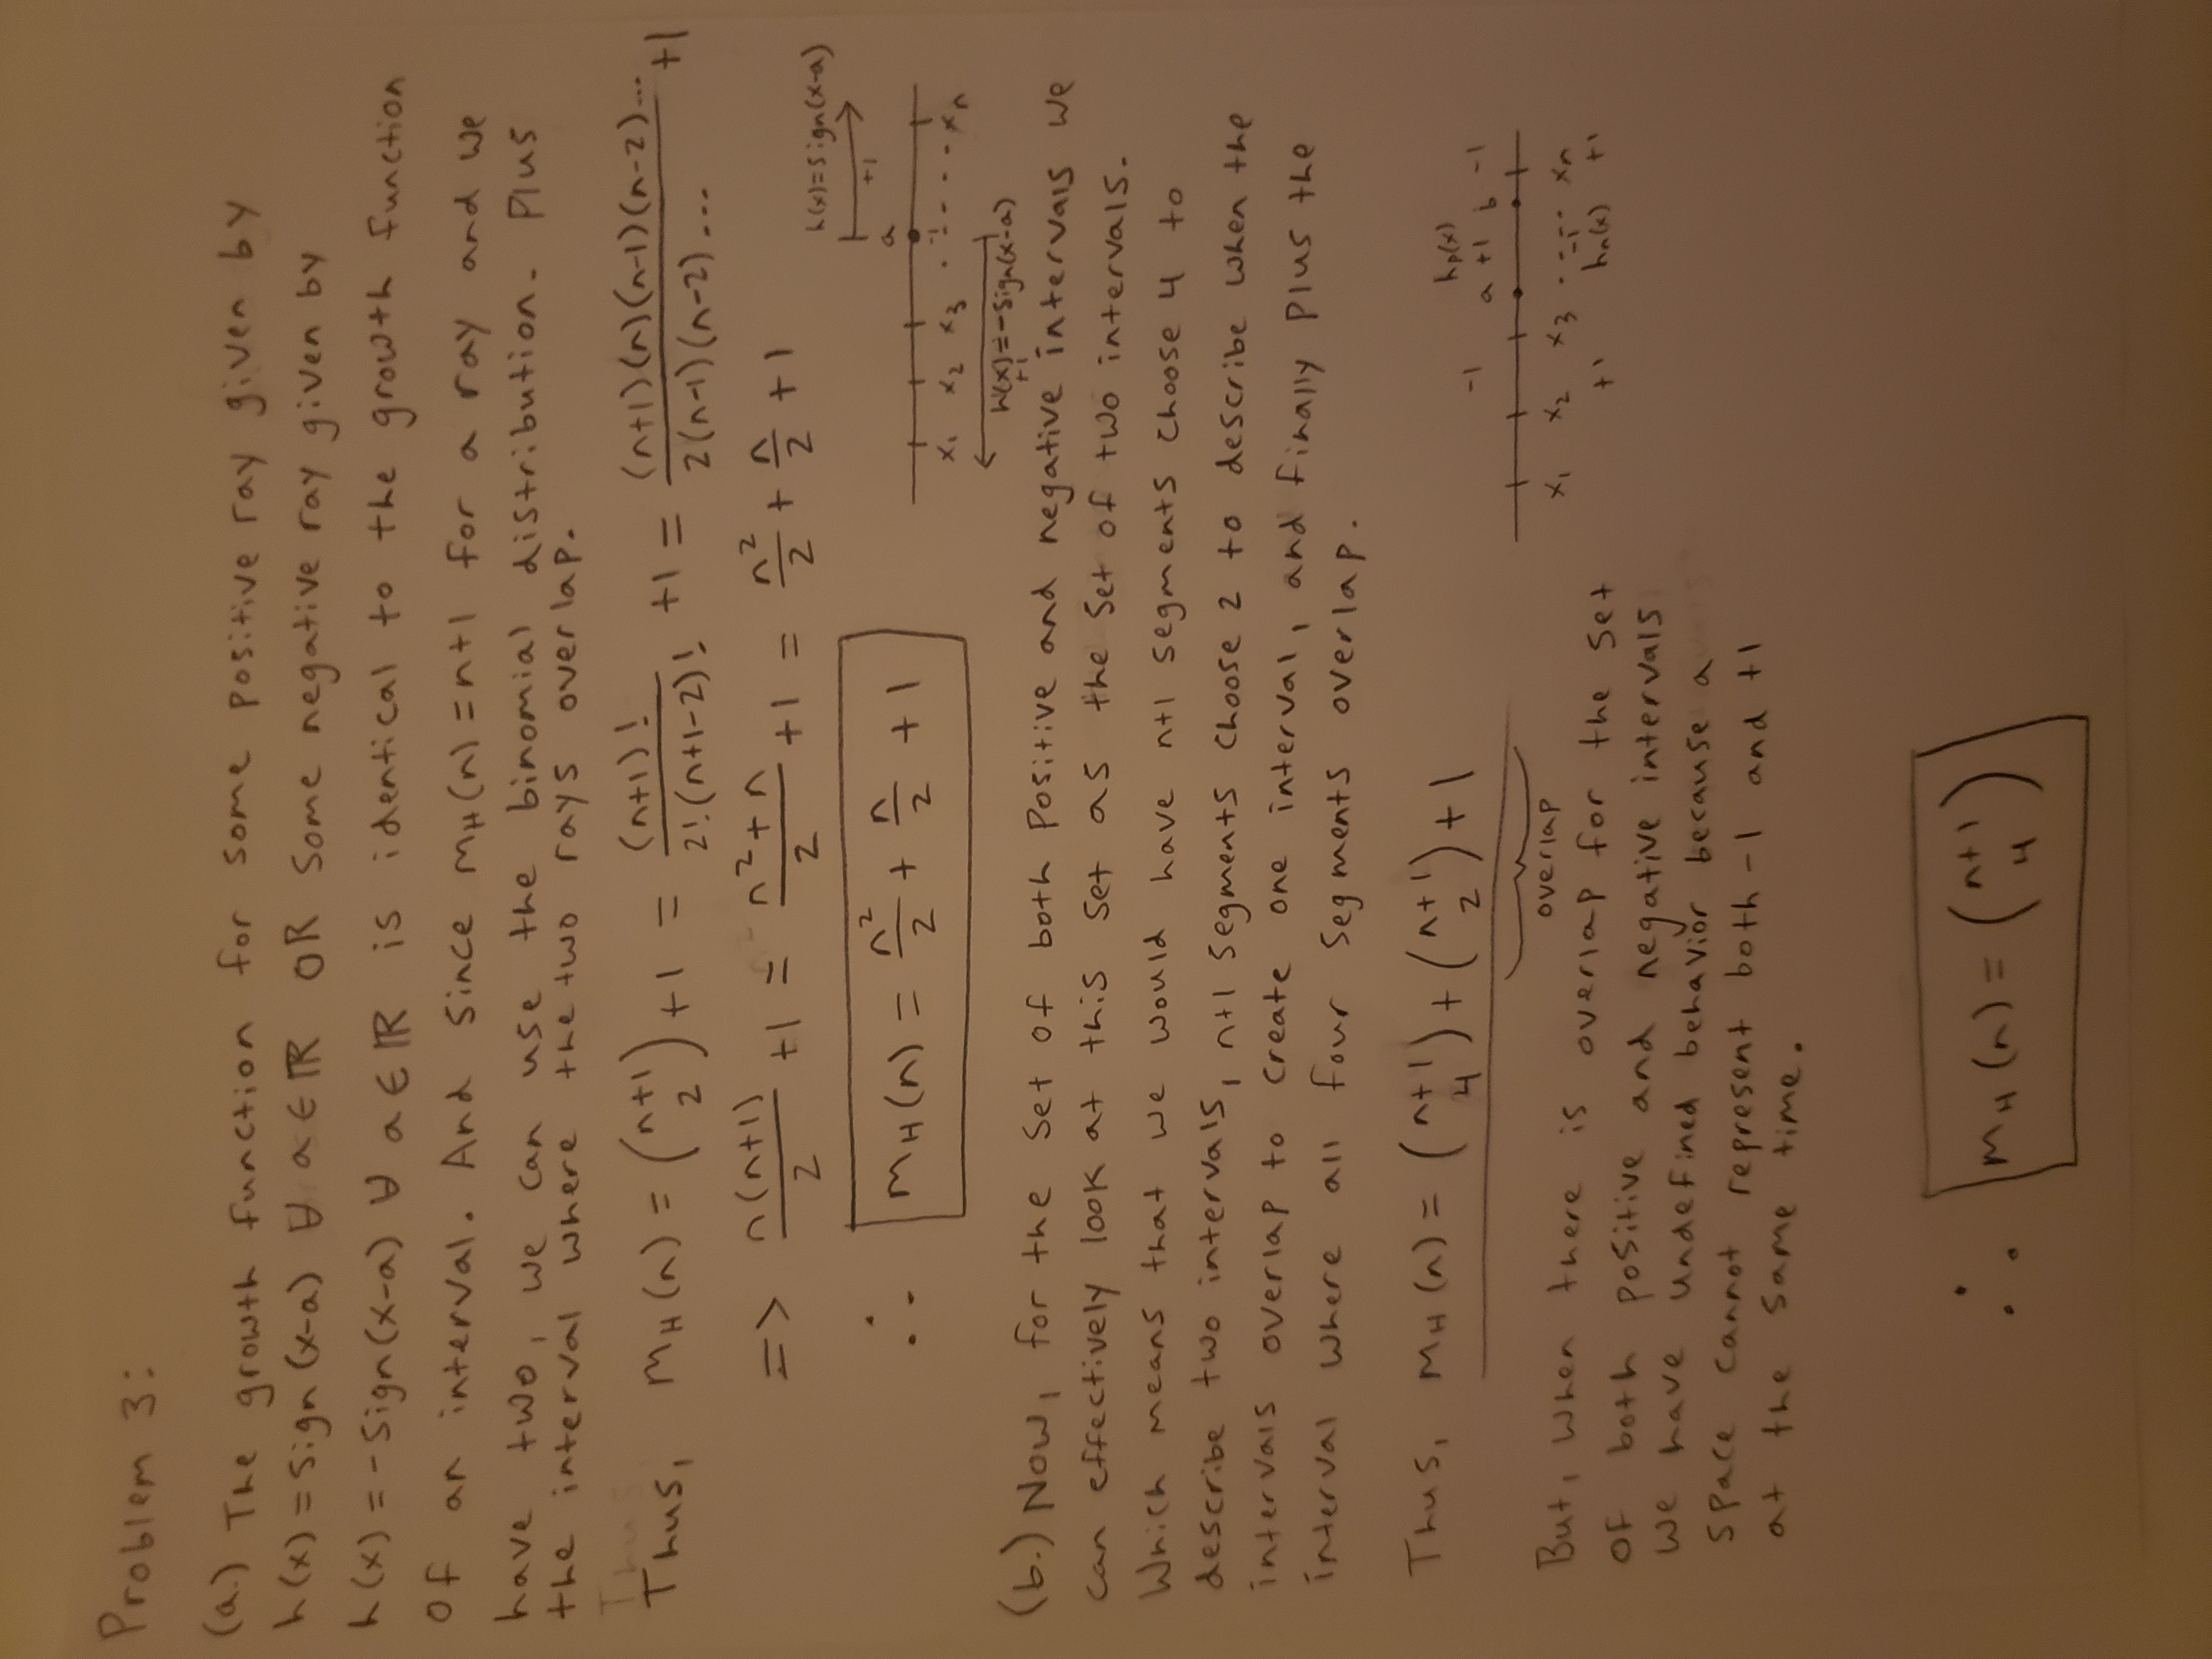

<h2><font color="black">Problem 4</font></h2>

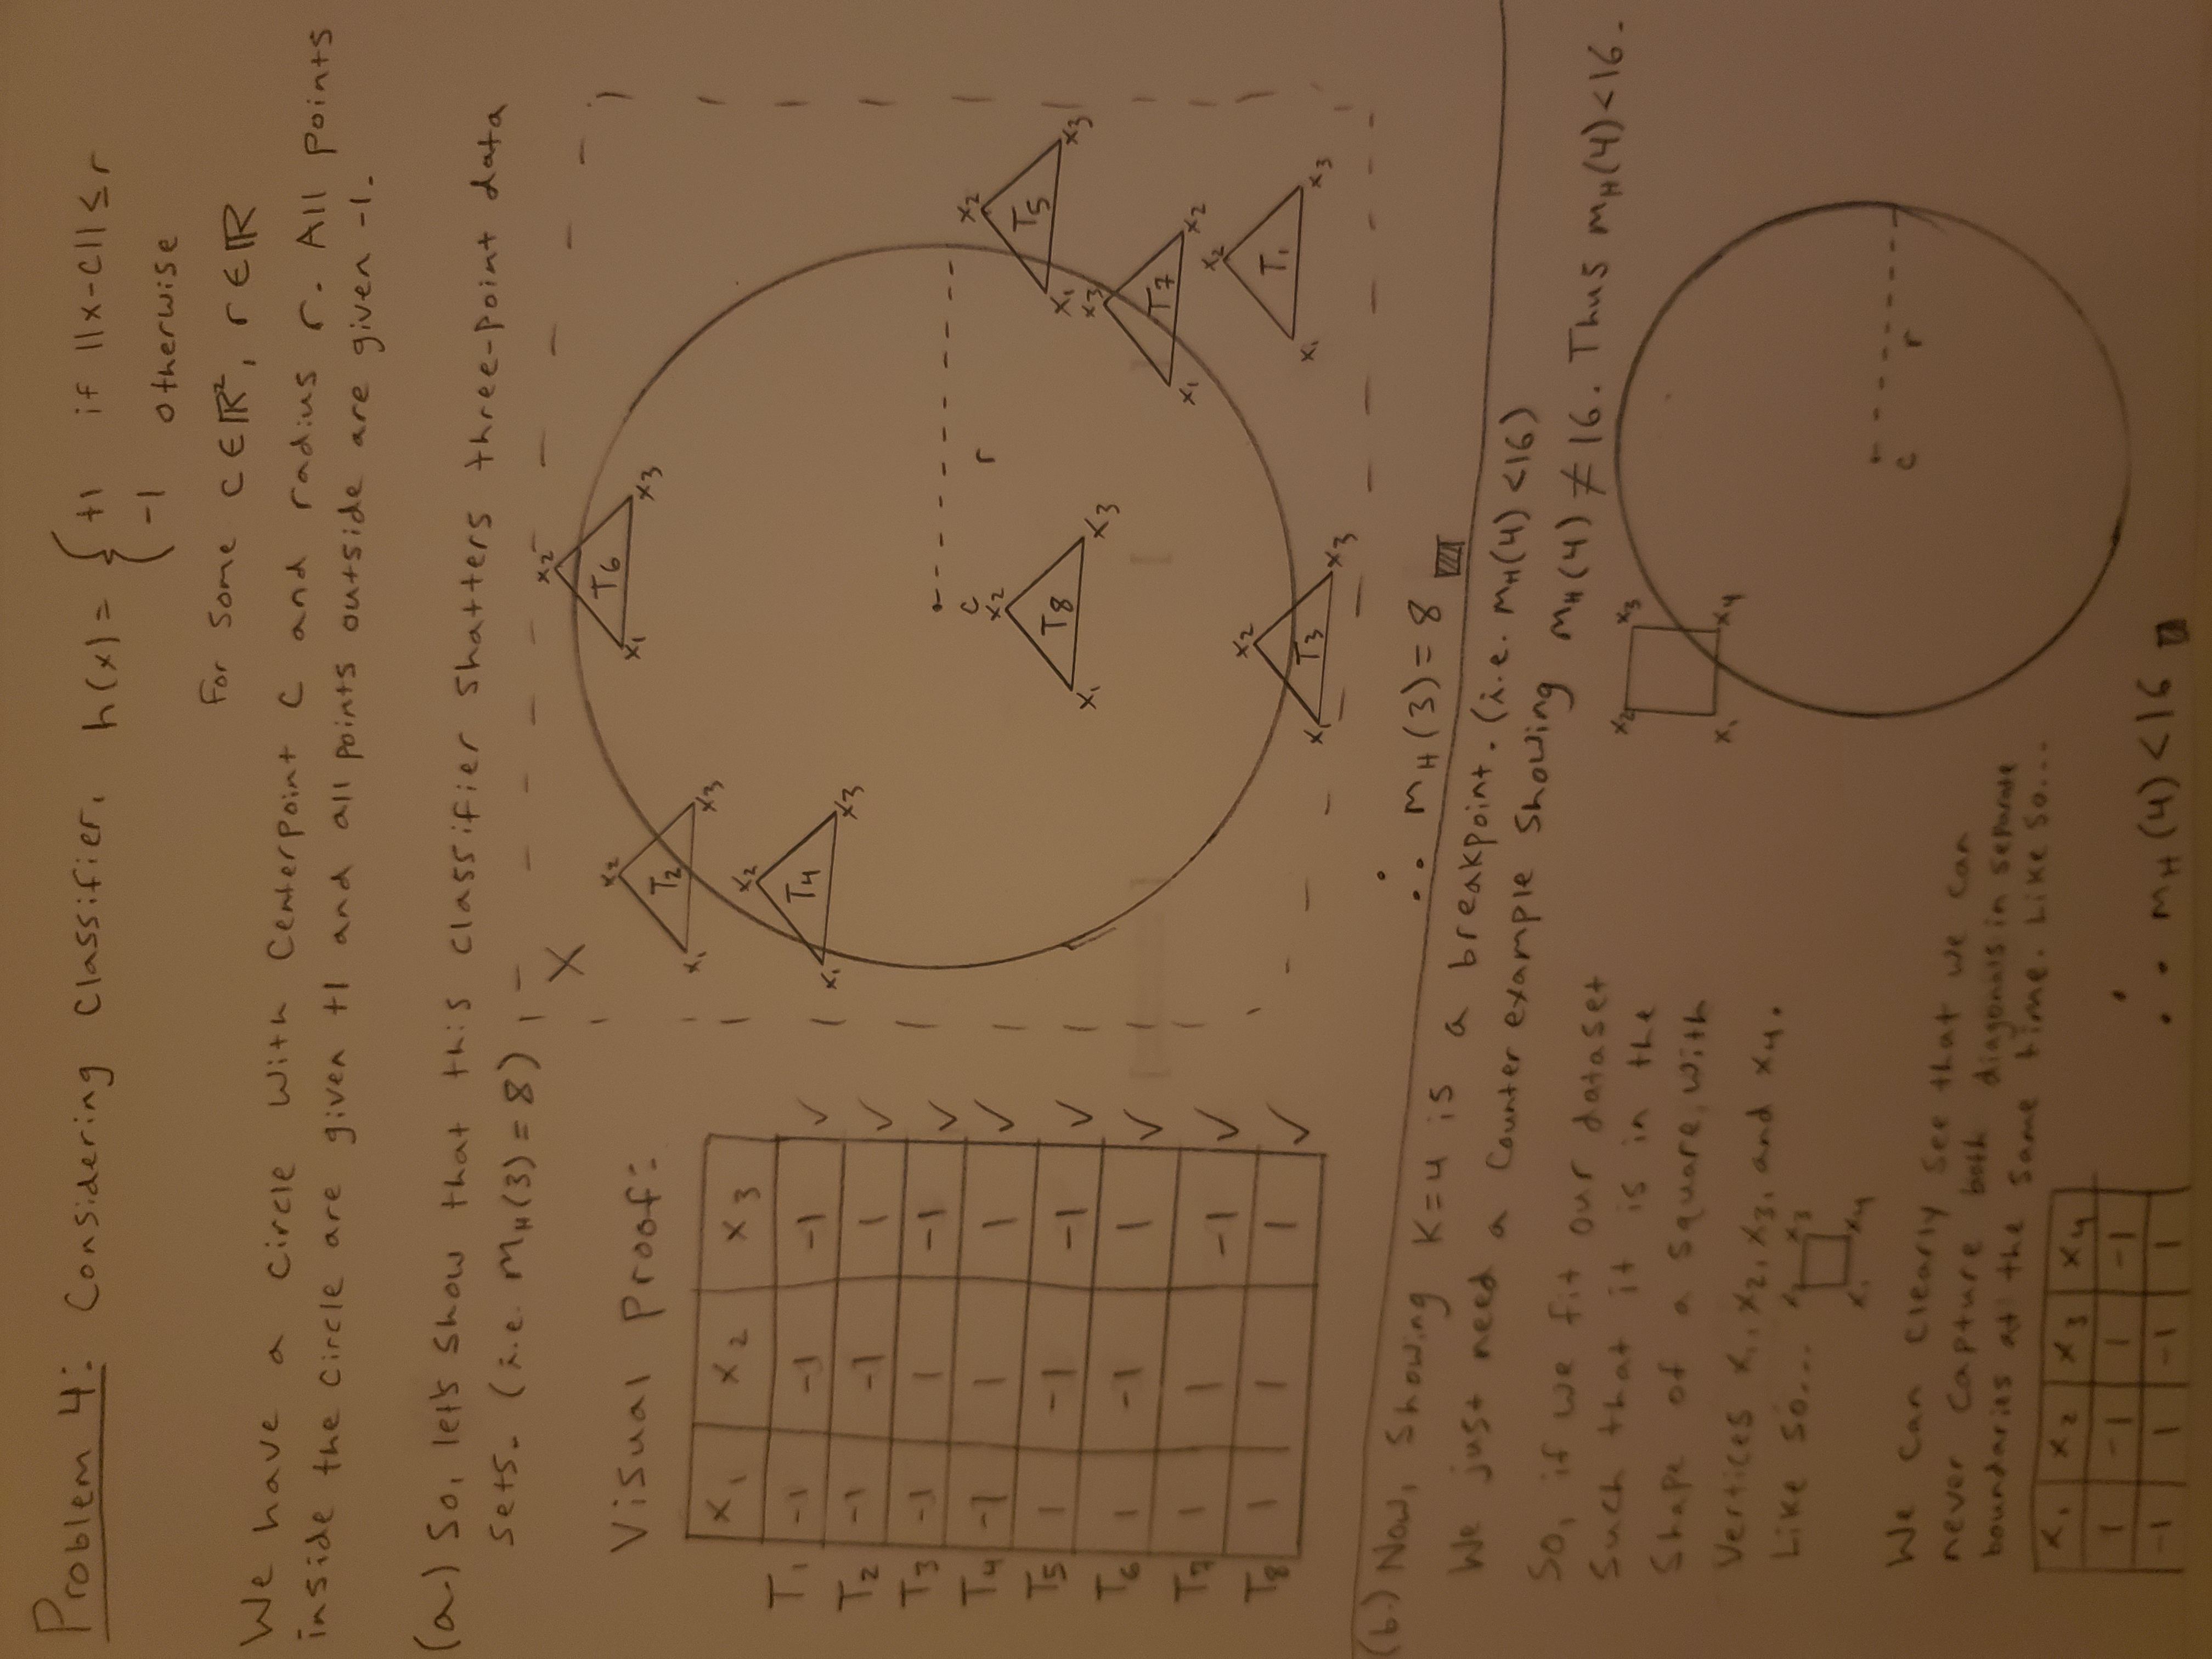